(303, 14)


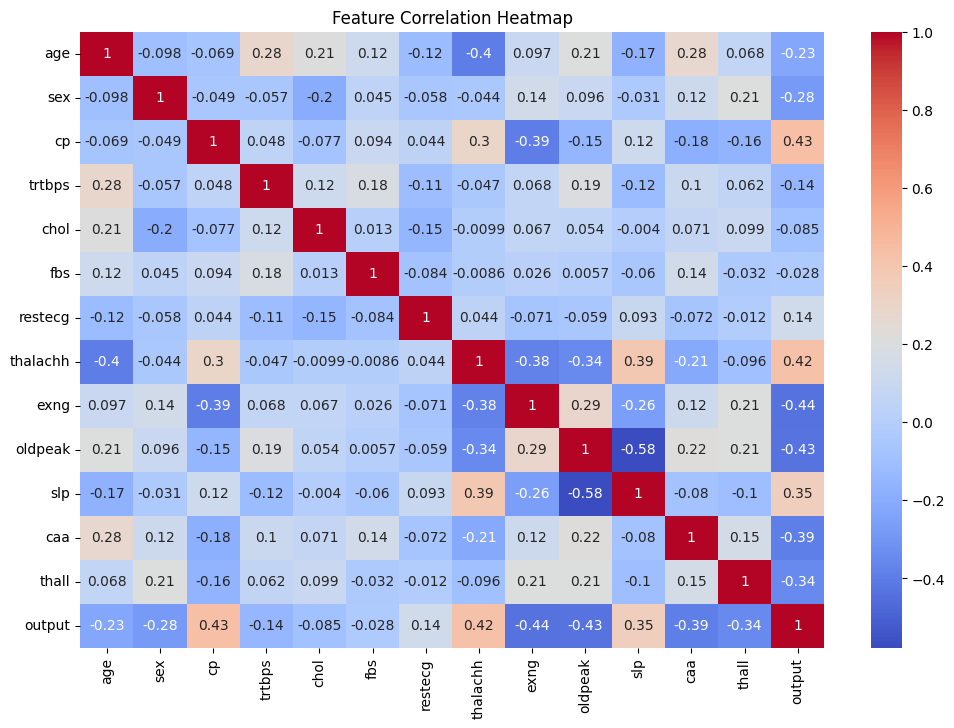

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

data = pd.read_csv('heart.csv')
print(data.shape)

data.head()
data.isnull().sum()

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
print(data.select_dtypes(include=[np.number]).columns)
print(data.head())

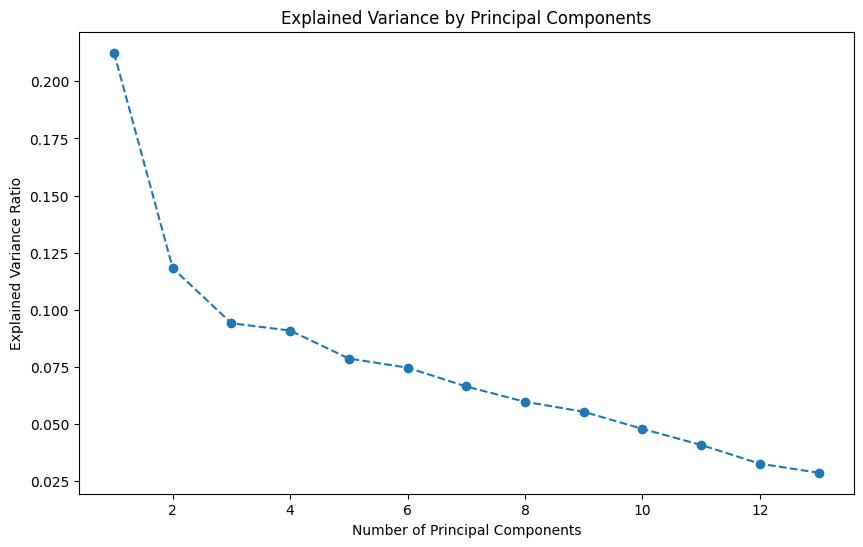

In [11]:
df = pd.DataFrame(data)
X=df.drop('output',axis=1)
y=df['output']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_scaled)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

Logistic Regression Performance:
Accuracy: 0.85
Precision: 0.87
Recall: 0.84
F1 Score: 0.86


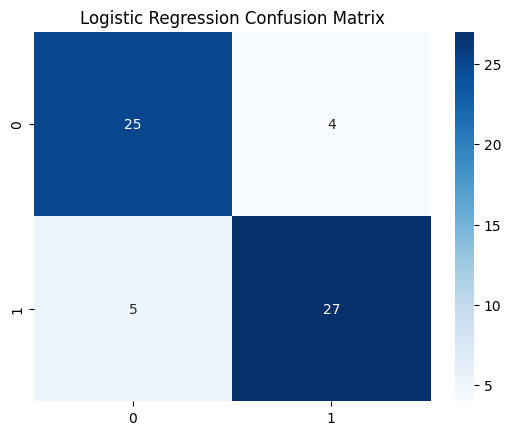

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg, pos_label=1):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg, pos_label=1):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg, pos_label=1):.2f}")

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Decision Tree Performance:
Accuracy: 0.75
Precision: 0.84
Recall: 0.66
F1 Score: 0.74


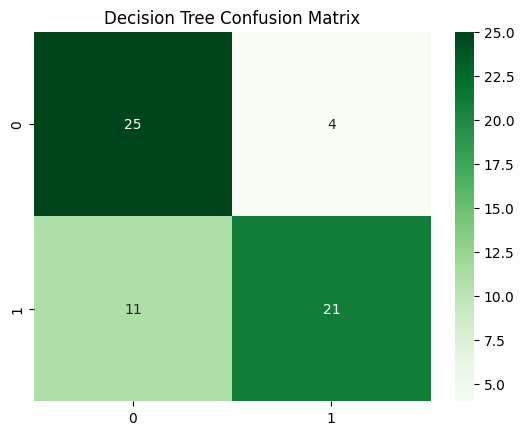

In [14]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_tree, pos_label=1):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_tree, pos_label=1):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tree, pos_label=1):.2f}")

conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.show()